In [ ]:
import pandas as pd
import string
import re
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'hindi_fnl_dataset.csv'  # Update with correct path
data = pd.read_csv(file_path)

# Define custom Gujarati stopwords (expand as needed)
gujarati_stopwords =set(['और', 'का', 'है', 'के', 'की', 'से', 'को', 'पर', 'यह', 'था', 'हूँ', 'ही', 'हैं', 'इस', 'था', 'हो', 'है', 'भी', 'जो', 'तक', 'में', 'नहीं', 'तो', 'कर', 'रहा', 'थे', 'एक', 'कि', 'था', 'थे', 'सब', 'कभी', 'होता', 'बाद', 'साथ', 'लिए', 'दो', 'अब', 'तक', 'आप', 'हम', 'वे', 'उन', 'उनका', 'मुझे', 'यहाँ', 'किया', 'दिया', 'गया', 'रही', 'रहे', 'क्या', 'कौन', 'कब', 'कैसे', 'जैसे', 'जब', 'किस', 'यदि', 'यही', 'उसे', 'वह', 'थी', 'रख', 'हो', 'हूँ', 'जाता', 'जाती', 'रहेगा', 'होगा', 'जाने', 'करना', 'आदि', 'कहाँ', 'यानी', 'उसका'
])  # Add relevant Gujarati stopwords

# Function for text normalization and stopword removal
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\u0900-\u097F ]', '', text)  # Keep only Hindi (Devanagari) characters
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in gujarati_stopwords])  # Remove stopwords
    return text

# Apply preprocessing to normalize text and remove stopwords
data['Processed_Sentence'] = data['Sentence'].apply(preprocess_text)

# Filter sentences based on length (e.g., between 5 and 50 words)
min_length = 5
max_length = 50

def filter_sentence_length(text):
    word_count = len(text.split())
    return min_length <= word_count <= max_length

data = data[data['Processed_Sentence'].apply(filter_sentence_length)]

# Encode the Sentiment and Emotion columns
sentiment_encoder = LabelEncoder()
emotion_encoder = LabelEncoder()

data['Sentiment_Label'] = sentiment_encoder.fit_transform(data['Sentiment'])
data['Emotion_Label'] = emotion_encoder.fit_transform(data['Emotion'])


<ipython-input-2-c06af1c01e2f>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment_Label'] = sentiment_encoder.fit_transform(data['Sentiment'])
<ipython-input-2-c06af1c01e2f>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Emotion_Label'] = emotion_encoder.fit_transform(data['Emotion'])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Splitting the data for Sentiment prediction
X = data['Processed_Sentence']
y_sentiment = data['Sentiment_Label']

X_train_sentiment, X_test_sentiment, y_train_sentiment, y_test_sentiment = train_test_split(X, y_sentiment, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data, and transform the test data
X_train_tfidf_sentiment = tfidf_vectorizer.fit_transform(X_train_sentiment)
X_test_tfidf_sentiment = tfidf_vectorizer.transform(X_test_sentiment)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Naive Bayes model
nb_sentiment = MultinomialNB()

# Train the model
nb_sentiment.fit(X_train_tfidf_sentiment, y_train_sentiment)

# Make predictions on test data
y_pred_sentiment = nb_sentiment.predict(X_test_tfidf_sentiment)

# Evaluate the model
accuracy_sentiment = accuracy_score(y_test_sentiment, y_pred_sentiment)
classification_report_sentiment = classification_report(y_test_sentiment, y_pred_sentiment, target_names=sentiment_encoder.classes_)
confusion_matrix_sentiment = confusion_matrix(y_test_sentiment, y_pred_sentiment)

# Display evaluation results for Sentiment
print("Sentiment Prediction Accuracy:", accuracy_sentiment)
print("Classification Report:\n", classification_report_sentiment)
print("Confusion Matrix:\n", confusion_matrix_sentiment)


Sentiment Prediction Accuracy: 0.8840524974034558
Classification Report:
               precision    recall  f1-score   support

    Negative       0.89      0.92      0.90     12067
     Neutral       0.87      0.82      0.84      8659
    Positive       0.89      0.90      0.89     11047

    accuracy                           0.88     31773
   macro avg       0.88      0.88      0.88     31773
weighted avg       0.88      0.88      0.88     31773

Confusion Matrix:
 [[11094   415   558]
 [  905  7105   649]
 [  514   643  9890]]


In [ ]:
# Splitting the data for Emotion prediction
y_emotion = data['Emotion_Label']

X_train_emotion, X_test_emotion, y_train_emotion, y_test_emotion = train_test_split(X, y_emotion, test_size=0.2, random_state=42)

# TF-IDF Vectorization for Emotion
X_train_tfidf_emotion = tfidf_vectorizer.fit_transform(X_train_emotion)
X_test_tfidf_emotion = tfidf_vectorizer.transform(X_test_emotion)

# Initialize Naive Bayes for Emotion prediction
nb_emotion = MultinomialNB()

# Train the model
nb_emotion.fit(X_train_tfidf_emotion, y_train_emotion)

# Make predictions on test data
y_pred_emotion = nb_emotion.predict(X_test_tfidf_emotion)

# Evaluate the model
accuracy_emotion = accuracy_score(y_test_emotion, y_pred_emotion)
classification_report_emotion = classification_report(y_test_emotion, y_pred_emotion, target_names=emotion_encoder.classes_)
confusion_matrix_emotion = confusion_matrix(y_test_emotion, y_pred_emotion)

# Display evaluation results for Emotion
print("Emotion Prediction Accuracy:", accuracy_emotion)
print("Classification Report:\n", classification_report_emotion)
print("Confusion Matrix:\n", confusion_matrix_emotion)


Emotion Prediction Accuracy: 0.8135523872470336
Classification Report:
               precision    recall  f1-score   support

  Acceptance       0.86      0.97      0.92      3214
       Anger       0.89      0.85      0.87      4065
        Calm       0.79      0.69      0.74      2770
       Grief       0.72      0.77      0.74      4075
        Hope       0.84      0.90      0.87      3240
         Joy       0.85      0.94      0.89      4315
        Love       0.78      0.75      0.76      3492
       Peace       0.82      0.65      0.73      2675
     Sadness       0.77      0.73      0.75      3927

    accuracy                           0.81     31773
   macro avg       0.81      0.81      0.81     31773
weighted avg       0.81      0.81      0.81     31773

Confusion Matrix:
 [[3127    0    3    2   37    1   38    5    1]
 [  26 3451   63  120   55   81  114   60   95]
 [  95   98 1920  139   85   62  145  161   65]
 [  31   84   58 3150   47   46  100   61  498]
 [  66    9 

In [ ]:
import joblib

# Save the sentiment and emotion models
joblib.dump(nb_sentiment, 'sentiment_model.pkl')
joblib.dump(nb_emotion, 'emotion_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [ ]:
# Custom sentences for testing
custom_sentences = ["तेरी बातें दिल को सुकून देती हैं जैसे सावन की पहली बारिश",
"दिल के कोने में कुछ टूटता हुआ सा महसूस होता है, जैसे पत्ते गिरते हैं शाखों से",
"अगर आप अपने सपनों को सच करना चाहते हैं, तो आपको लगातार प्रयास करना होगा",
"जब सह-अस्तित्व सहायता करता है, तब जीवन को अपनाना सरल हो जाता है",
"जीवन में जब हर दिन नई मुस्कान मिलती है तो दिल खुशी से भर जाता है"
]

# English translations of the custom sentences
english_translations = ["Your words bring peace to my heart, like the first rain of the monsoon",
"In the depths of my heart, there is a silence, like an instrument without melody",
"If you want to make your dreams come true, you have to keep making continuous efforts",
"When coexistence offers help, accepting life becomes easier",
"When every day brings a new smile in life, the heart fills with happiness"
]

# Preprocess the custom sentences
custom_processed_sentences = [preprocess_text(sentence) for sentence in custom_sentences]

# Transform the custom sentences using the fitted TF-IDF vectorizer
custom_tfidf = tfidf_vectorizer.transform(custom_processed_sentences)

# Predict sentiment for custom sentences
custom_sentiment_predictions = nb_sentiment.predict(custom_tfidf)
custom_sentiment_labels = sentiment_encoder.inverse_transform(custom_sentiment_predictions)

# Predict emotion for custom sentences
custom_emotion_predictions = nb_emotion.predict(custom_tfidf)
custom_emotion_labels = emotion_encoder.inverse_transform(custom_emotion_predictions)

# Display the custom sentences with their predicted sentiment, emotion, and English translations
for i, sentence in enumerate(custom_sentences):
    print(f"Gujarati Sentence: {sentence}")
    print(f"English Translation: {english_translations[i]}")
    print(f"Predicted Sentiment: {custom_sentiment_labels[i]}")
    print(f"Predicted Emotion: {custom_emotion_labels[i]}")
    print("-" * 50)


Gujarati Sentence: तेरी बातें दिल को सुकून देती हैं जैसे सावन की पहली बारिश
English Translation: Your words bring peace to my heart, like the first rain of the monsoon
Predicted Sentiment: Positive
Predicted Emotion: Hope
--------------------------------------------------
Gujarati Sentence: दिल के कोने में कुछ टूटता हुआ सा महसूस होता है, जैसे पत्ते गिरते हैं शाखों से
English Translation: In the depths of my heart, there is a silence, like an instrument without melody
Predicted Sentiment: Negative
Predicted Emotion: Grief
--------------------------------------------------
Gujarati Sentence: अगर आप अपने सपनों को सच करना चाहते हैं, तो आपको लगातार प्रयास करना होगा
English Translation: If you want to make your dreams come true, you have to keep making continuous efforts
Predicted Sentiment: Negative
Predicted Emotion: Anger
--------------------------------------------------
Gujarati Sentence: जब सह-अस्तित्व सहायता करता है, तब जीवन को अपनाना सरल हो जाता है
English Translation: When coexisten

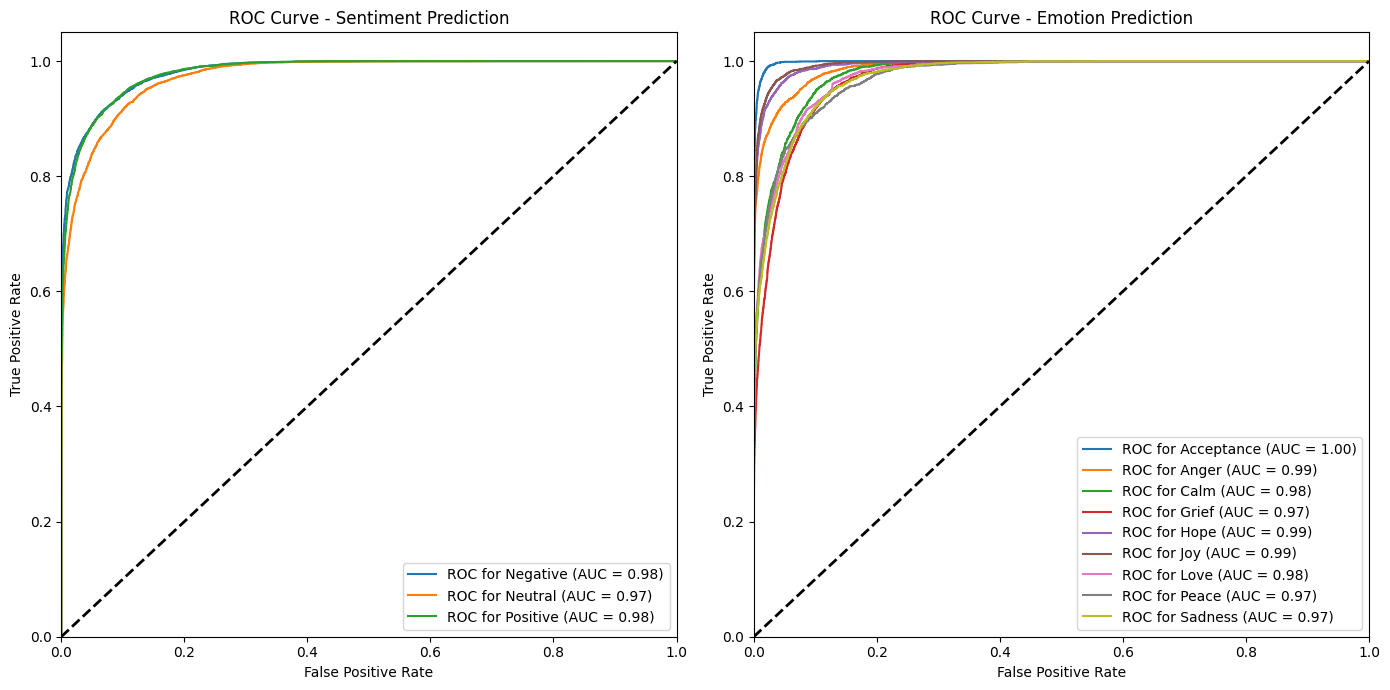

In [ ]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder

# Load the saved models and TF-IDF vectorizer
nb_sentiment = joblib.load('sentiment_model.pkl')
nb_emotion = joblib.load('emotion_model.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Load your dataset to refit the LabelEncoder with actual classes
file_path = 'hindi_fnl_dataset.csv'  # Update with the correct file path
data = pd.read_csv(file_path)

# Re-fit the LabelEncoder for both sentiment and emotion
sentiment_encoder = LabelEncoder()
emotion_encoder = LabelEncoder()

sentiment_encoder.fit(data['Sentiment'])  # Fit using the actual classes from the dataset
emotion_encoder.fit(data['Emotion'])

# Assuming the test set is already available
# X_test_sentiment, y_test_sentiment, X_test_emotion, y_test_emotion

# Transform the test data using the TF-IDF vectorizer
X_test_tfidf_sentiment = tfidf_vectorizer.transform(X_test_sentiment)
X_test_tfidf_emotion = tfidf_vectorizer.transform(X_test_emotion)

# Get the predicted probabilities for sentiment and emotion
y_prob_sentiment = nb_sentiment.predict_proba(X_test_tfidf_sentiment)
y_prob_emotion = nb_emotion.predict_proba(X_test_tfidf_emotion)

# Binarize the true labels for multi-class ROC/AUC
y_test_sentiment_binarized = label_binarize(y_test_sentiment, classes=np.arange(len(sentiment_encoder.classes_)))
y_test_emotion_binarized = label_binarize(y_test_emotion, classes=np.arange(len(emotion_encoder.classes_)))

# Calculate ROC curves and AUC for each class (sentiment)
fpr_sentiment = dict()
tpr_sentiment = dict()
roc_auc_sentiment = dict()

for i in range(len(sentiment_encoder.classes_)):
    fpr_sentiment[i], tpr_sentiment[i], _ = roc_curve(y_test_sentiment_binarized[:, i], y_prob_sentiment[:, i])
    roc_auc_sentiment[i] = auc(fpr_sentiment[i], tpr_sentiment[i])

# Plot ROC curves for each sentiment class
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
for i in range(len(sentiment_encoder.classes_)):
    plt.plot(fpr_sentiment[i], tpr_sentiment[i], label=f'ROC for {sentiment_encoder.classes_[i]} (AUC = {roc_auc_sentiment[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Sentiment Prediction')
plt.legend(loc="lower right")

# Calculate ROC curves and AUC for each class (emotion)
fpr_emotion = dict()
tpr_emotion = dict()
roc_auc_emotion = dict()

for i in range(len(emotion_encoder.classes_)):
    fpr_emotion[i], tpr_emotion[i], _ = roc_curve(y_test_emotion_binarized[:, i], y_prob_emotion[:, i])
    roc_auc_emotion[i] = auc(fpr_emotion[i], tpr_emotion[i])

# Plot ROC curves for each emotion class
plt.subplot(1, 2, 2)
for i in range(len(emotion_encoder.classes_)):
    plt.plot(fpr_emotion[i], tpr_emotion[i], label=f'ROC for {emotion_encoder.classes_[i]} (AUC = {roc_auc_emotion[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Emotion Prediction')
plt.legend(loc="lower right")

# Show the plots
plt.tight_layout()
plt.show()


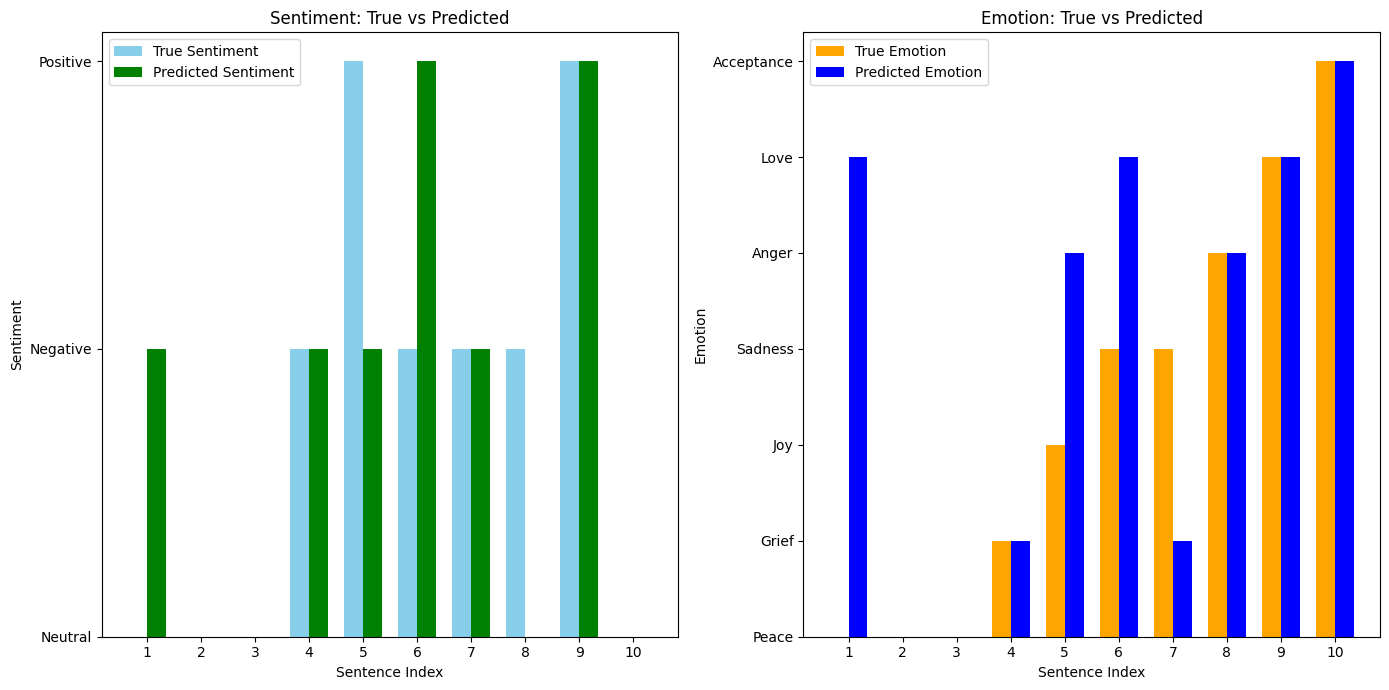

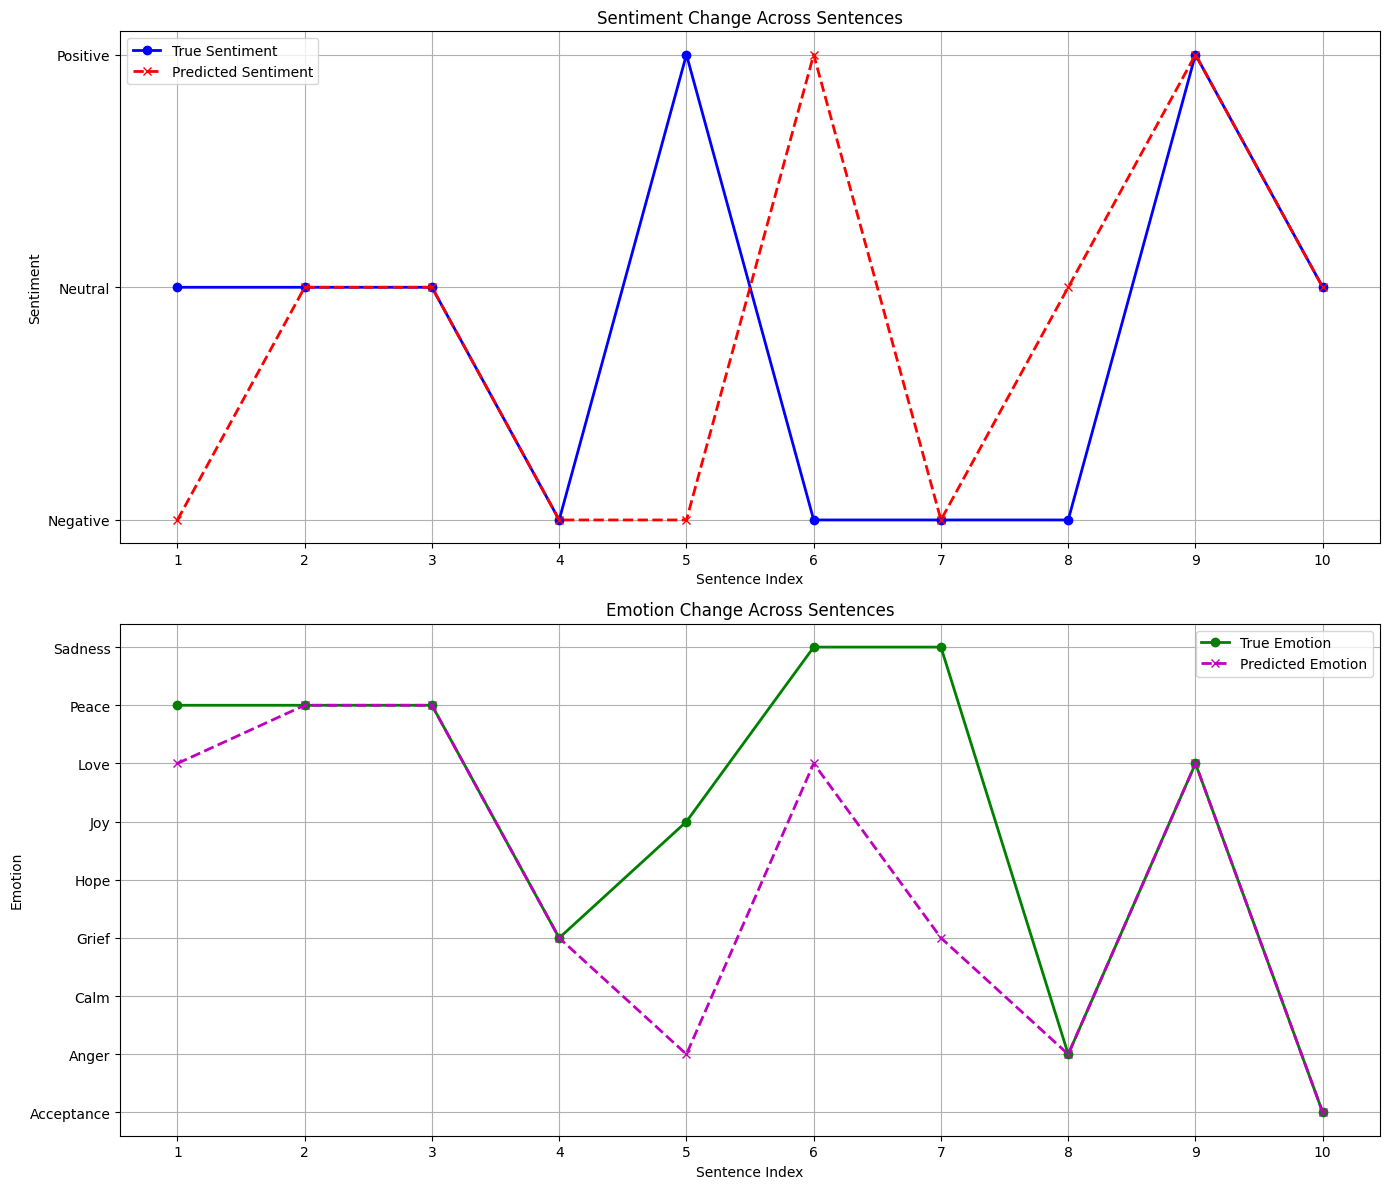

In [ ]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the saved models and TF-IDF vectorizer
nb_sentiment = joblib.load('sentiment_model.pkl')
nb_emotion = joblib.load('emotion_model.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Load the dataset
file_path = 'hindi_fnl_dataset.csv'  # Update with correct path
data = pd.read_csv(file_path)

# Re-fit the LabelEncoder for both sentiment and emotion
sentiment_encoder = LabelEncoder()
emotion_encoder = LabelEncoder()

sentiment_encoder.fit(data['Sentiment'])  # Fit using actual classes from the dataset
emotion_encoder.fit(data['Emotion'])

# Randomly select 10 sentences from the dataset for testing
sample_data = data.sample(n=10, random_state=400)
sample_sentences = sample_data['Sentence'].tolist()
sample_true_sentiments = sample_data['Sentiment'].tolist()
sample_true_emotions = sample_data['Emotion'].tolist()

# Preprocess the selected sentences
def preprocess_text(text):
    # Add your preprocessing steps (lowercase, punctuation removal, etc.)
    return text.lower()

sample_processed_sentences = [preprocess_text(sentence) for sentence in sample_sentences]

# Transform the selected sentences using the TF-IDF vectorizer
sample_tfidf = tfidf_vectorizer.transform(sample_processed_sentences)

# Predict sentiment and emotion for the sample sentences
pred_sentiment = nb_sentiment.predict(sample_tfidf)
pred_emotion = nb_emotion.predict(sample_tfidf)

# Decode predicted labels
predicted_sentiment_labels = sentiment_encoder.inverse_transform(pred_sentiment)
predicted_emotion_labels = emotion_encoder.inverse_transform(pred_emotion)

# Plotting Bar Plot: True vs Predicted Sentiment
plt.figure(figsize=(14, 7))

# Sentiment Bar Plot
plt.subplot(1, 2, 1)
x = np.arange(len(sample_sentences))  # Label locations
bar_width = 0.35  # Width of the bars

# Plot bars for true sentiment
plt.bar(x - bar_width/2, sample_true_sentiments, width=bar_width, color='skyblue', label='True Sentiment')

# Plot bars for predicted sentiment
plt.bar(x + bar_width/2, predicted_sentiment_labels, width=bar_width, color='green', label='Predicted Sentiment')

# Label the plot
plt.title('Sentiment: True vs Predicted')
plt.xlabel('Sentence Index')
plt.ylabel('Sentiment')
plt.xticks(x, range(1, len(sample_sentences) + 1))
plt.legend()

# Plotting Bar Plot: True vs Predicted Emotion
plt.subplot(1, 2, 2)
x = np.arange(len(sample_sentences))  # Label locations

# Plot bars for true emotion
plt.bar(x - bar_width/2, sample_true_emotions, width=bar_width, color='orange', label='True Emotion')

# Plot bars for predicted emotion
plt.bar(x + bar_width/2, predicted_emotion_labels, width=bar_width, color='blue', label='Predicted Emotion')

# Label the plot
plt.title('Emotion: True vs Predicted')
plt.xlabel('Sentence Index')
plt.ylabel('Emotion')
plt.xticks(x, range(1, len(sample_sentences) + 1))
plt.legend()

# Show bar plots
plt.tight_layout()
plt.show()

# Line Graph for Sentiment and Emotion Predictions

# Map sentiment and emotion labels to indices for plotting
sentiment_index = {label: idx for idx, label in enumerate(sentiment_encoder.classes_)}
emotion_index = {label: idx for idx, label in enumerate(emotion_encoder.classes_)}

# Convert label names to indices for plotting
true_sentiment_indices = [sentiment_index[label] for label in sample_true_sentiments]
predicted_sentiment_indices = [sentiment_index[label] for label in predicted_sentiment_labels]

true_emotion_indices = [emotion_index[label] for label in sample_true_emotions]
predicted_emotion_indices = [emotion_index[label] for label in predicted_emotion_labels]

# Create line plots
plt.figure(figsize=(14, 12))

# Plot Sentiment
plt.subplot(2, 1, 1)
plt.plot(range(len(sample_sentences)), true_sentiment_indices, marker='o', linestyle='-', color='b', label='True Sentiment', linewidth=2)
plt.plot(range(len(sample_sentences)), predicted_sentiment_indices, marker='x', linestyle='--', color='r', label='Predicted Sentiment', linewidth=2)
plt.title('Sentiment Change Across Sentences')
plt.xlabel('Sentence Index')
plt.ylabel('Sentiment')
plt.yticks(ticks=range(len(sentiment_encoder.classes_)), labels=sentiment_encoder.classes_)
plt.xticks(range(len(sample_sentences)), range(1, len(sample_sentences) + 1))
plt.legend()
plt.grid(True)

# Plot Emotion
plt.subplot(2, 1, 2)
plt.plot(range(len(sample_sentences)), true_emotion_indices, marker='o', linestyle='-', color='g', label='True Emotion', linewidth=2)
plt.plot(range(len(sample_sentences)), predicted_emotion_indices, marker='x', linestyle='--', color='m', label='Predicted Emotion', linewidth=2)
plt.title('Emotion Change Across Sentences')
plt.xlabel('Sentence Index')
plt.ylabel('Emotion')
plt.yticks(ticks=range(len(emotion_encoder.classes_)), labels=emotion_encoder.classes_)
plt.xticks(range(len(sample_sentences)), range(1, len(sample_sentences) + 1))
plt.legend()
plt.grid(True)

# Show the line graphs
plt.tight_layout()
plt.show()
